In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputRegressor 
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
def InsertBorder(image):
    new_image = np.zeros((image.shape[0]+2, image.shape[1]+2, image.shape[2]))
    
    #Copying the image 
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            new_image[i+1,j+1,:] = image[i,j,:]
    
    #Inserting the border
    new_image[0,:,:] = new_image[1,:,:]
    new_image[new_image.shape[0]-1,:,:] = new_image[new_image.shape[0]-2,:,:]
    
    new_image[:,0,:] = new_image[:,1,:]
    new_image[:,new_image.shape[1]-1,:] = new_image[:,new_image.shape[1]-2,:]
    return np.uint8(new_image)

In [75]:
def BGR2YCrCb(image):
    
    Y, Cr, Cb = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb))
    return cv2.merge([Y, Cr, Cb])

def YCrCb2BGR(image):
    B, G, R = cv2.split(cv2.cvtColor(image, cv2.COLOR_YCrCb2BGR))
    return cv2.merge([B, G, R])

In [76]:
def ExtractFeatures(image):
    
    new_image = InsertBorder(image)
    imageYCbCr = BGR2YCrCb(new_image)
    imageY = imageYCbCr[:,:,0]
    
    k = 0;
    features = np.zeros(((image.shape[0])*(image.shape[1]),9))
    
    for i in range(1,imageY.shape[0]-1):
        for j in range(1,imageY.shape[1]-1):
            features[k,0] = imageY[i-1,j-1]
            features[k,1] = imageY[i,j-1]
            features[k,2] = imageY[i+1,j-1]
            features[k,3] = imageY[i-1,j]
            features[k,4] = imageY[i,j]
            features[k,5] = imageY[i+1,j]
            features[k,6] = imageY[i-1,j+1]
            features[k,7] = imageY[i,j+1]
            features[k,8] = imageY[i+1,j+1]
            k += 1
    
    return features

In [139]:
def ExtractTargets(image):
    imageYCbCr = BGR2YCrCb(image)
    
    imageCr = imageYCbCr[:,:,1]
    imageCb = imageYCbCr[:,:,2]
    
    ImageCbVec = np.reshape(imageCb, (imageCb.shape[0]*imageCb.shape[1],1))
    ImageCrVec = np.reshape(imageCr, (imageCr.shape[0]*imageCr.shape[1],1))

    target = np.concatenate((ImageCbVec, ImageCrVec), 1)
    
    return target

In [140]:
def RecoverImage(imagevec,imageY,m,n):
    
    imageCb = np.reshape(imagevec[:,0], (m,n))
    imageCr = np.reshape(imagevec[:,1], (m,n))
    imageYCbCr = cv2.merge([np.uint8(imageY),np.uint8(imageCr), np.uint8(imageCb)])
    
    image = YCrCb2BGR(imageYCbCr)
    
    
    return image

In [161]:
image = cv2.imread('dragao.png')
Data = ExtractFeatures(image)/255
Target = ExtractTargets(image)/255

In [162]:
BestAccuracy = 0
BestNeurons = 0
for neurons in range(200,201):
    for i in range(0,1):
        NeuralNetwork = MLPRegressor(hidden_layer_sizes=(neurons,neurons), max_iter=2000, verbose=False) 
        NeuralNetwork.fit(Data, Target)  
        accuracy = NeuralNetwork.score(Data,Target)

        if accuracy > BestAccuracy:
            BestAccuracy = accuracy
            BestNeurons = neurons
            BestNN = NeuralNetwork

In [163]:
print("Melhor Acuracia:")
print(BestAccuracy)

print("Quantidade de Neuronios:")
print(BestNeurons)

Melhor Acuracia:
0.49275945027087176
Quantidade de Neuronios:
200


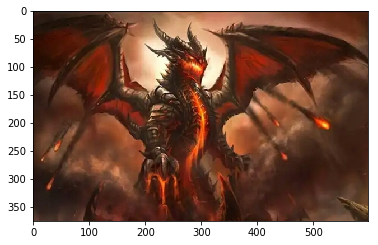

In [164]:
predictions = 255*BestNN.predict(Data)  

imageYCbCr = BGR2YCrCb(image)
imageY = imageYCbCr[:,:,0]

m = image.shape[0]
n = image.shape[1]

recover = RecoverImage(predictions,imageY,m,n)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


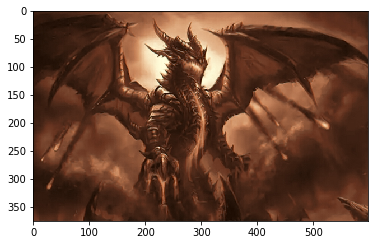

In [165]:
plt.imshow(cv2.cvtColor(np.uint8(recover), cv2.COLOR_BGR2RGB))